# Data Set Information:

Notes:

-- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.
-- Each instance represents captured features for 1 active region on the sun.
-- The data are divided into two sections. The second section (flare.data2) has had much more error correction applied to the it, and has consequently been treated as more reliable.




Attribute Information:

1. Code for class (modified Zurich class) (A,B,C,D,E,F,H)
2. Code for largest spot size (X,R,S,A,H,K)
3. Code for spot distribution (X,O,I,C)
4. Activity (1 = reduced, 2 = unchanged)
5. Evolution (1 = decay, 2 = no growth, 3 = growth)
6. Previous 24 hour flare activity code (1 = nothing as big as an M1, 2 = one M1, 3 = more activity than one M1)
7. Historically-complex (1 = Yes, 2 = No)
8. Did region become historically complex on this pass across the sun's disk (1 = yes, 2 = no)
9. Area (1 = small, 2 = large)
10. Area of the largest spot (1 = <=5, 2 = >5)

From all these predictors three classes of flares are predicted, which are represented in the last three columns.

11. C-class flares production by this region in the following 24 hours (common flares); Number
12. M-class flares production by this region in the following 24 hours (moderate flares); Number
13. X-class flares production by this region in the following 24 hours (severe flares); Number


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
df=pd.read_csv('/home/q/Desktop/ironhack/proj9/flare_data.csv')

In [7]:
df.rename(columns={'one':'Class','two':'Spot Size','three':'Spot Distribution','four':'Activity','five':'Evolution','six':'24hr activity','seven':'Historically-complex','eight':'Become complex on this pass','nine':'Area','ten':'Area of largest spot','eleven':'C-class','twelve':'M-class','thirteen':'X-class'}, inplace=True)

In [8]:
df     #creating dummies as model will not accept categorical data 

,Class,Spot Size,Spot Distribution,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,Area of largest spot,C-class,M-class,X-class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0


In [9]:
df.Class.value_counts()

H    331
D    239
C    211
B    147
E     95
F     43
Name: Class, dtype: int64

In [10]:
df.dtypes           #3 objects to reclassify

Class                          object
Spot Size                      object
Spot Distribution              object
Activity                        int64
Evolution                       int64
24hr activity                   int64
Historically-complex            int64
Become complex on this pass     int64
Area                            int64
Area of largest spot            int64
C-class                         int64
M-class                         int64
X-class                         int64
dtype: object

In [11]:
df.shape

(1066, 13)

In [12]:
df.columns

Index(['Class', 'Spot Size', 'Spot Distribution', 'Activity', 'Evolution',
       '24hr activity', 'Historically-complex', 'Become complex on this pass',
       'Area', 'Area of largest spot', 'C-class', 'M-class', 'X-class'],
      dtype='object')

In [13]:
df.describe()

,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,Area of largest spot,C-class,M-class,X-class
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000
mean,1.153846,2.401501,1.059099,1.404315,1.875235,1.025328,1.0,0.300188,0.046904,0.005629
std,0.360971,0.620584,0.320324,0.490989,0.330608,0.157194,0.0,0.835784,0.302811,0.086487
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.0,8.000000,5.000000,2.000000


In [14]:
df['Area of largest spot'].value_counts()  #dropping column due to only one value, information not pertinent

1    1066
Name: Area of largest spot, dtype: int64

In [15]:
df=df.drop(columns=['Area of largest spot'])

In [16]:
df = pd.concat([df, pd.get_dummies(df[['Class','Spot Size','Spot Distribution']])], axis=1)


In [17]:
df.isna().sum()

Class                          0
Spot Size                      0
Spot Distribution              0
Activity                       0
Evolution                      0
24hr activity                  0
Historically-complex           0
Become complex on this pass    0
Area                           0
C-class                        0
M-class                        0
X-class                        0
Class_B                        0
Class_C                        0
Class_D                        0
Class_E                        0
Class_F                        0
Class_H                        0
Spot Size_A                    0
Spot Size_H                    0
Spot Size_K                    0
Spot Size_R                    0
Spot Size_S                    0
Spot Size_X                    0
Spot Distribution_C            0
Spot Distribution_I            0
Spot Distribution_O            0
Spot Distribution_X            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Class                        1066 non-null   object
 1   Spot Size                    1066 non-null   object
 2   Spot Distribution            1066 non-null   object
 3   Activity                     1066 non-null   int64 
 4   Evolution                    1066 non-null   int64 
 5   24hr activity                1066 non-null   int64 
 6   Historically-complex         1066 non-null   int64 
 7   Become complex on this pass  1066 non-null   int64 
 8   Area                         1066 non-null   int64 
 9   C-class                      1066 non-null   int64 
 10  M-class                      1066 non-null   int64 
 11  X-class                      1066 non-null   int64 
 12  Class_B                      1066 non-null   uint8 
 13  Class_C                      1066

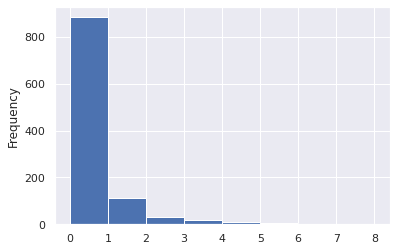

In [19]:
df['C-class'].plot.hist(bins=8)

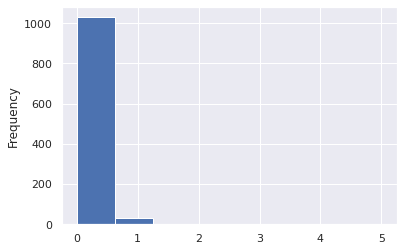

In [20]:
df['M-class'].plot.hist(bins=8)

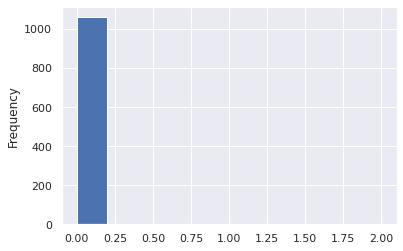

In [21]:
df['X-class'].plot.hist(bins=10)

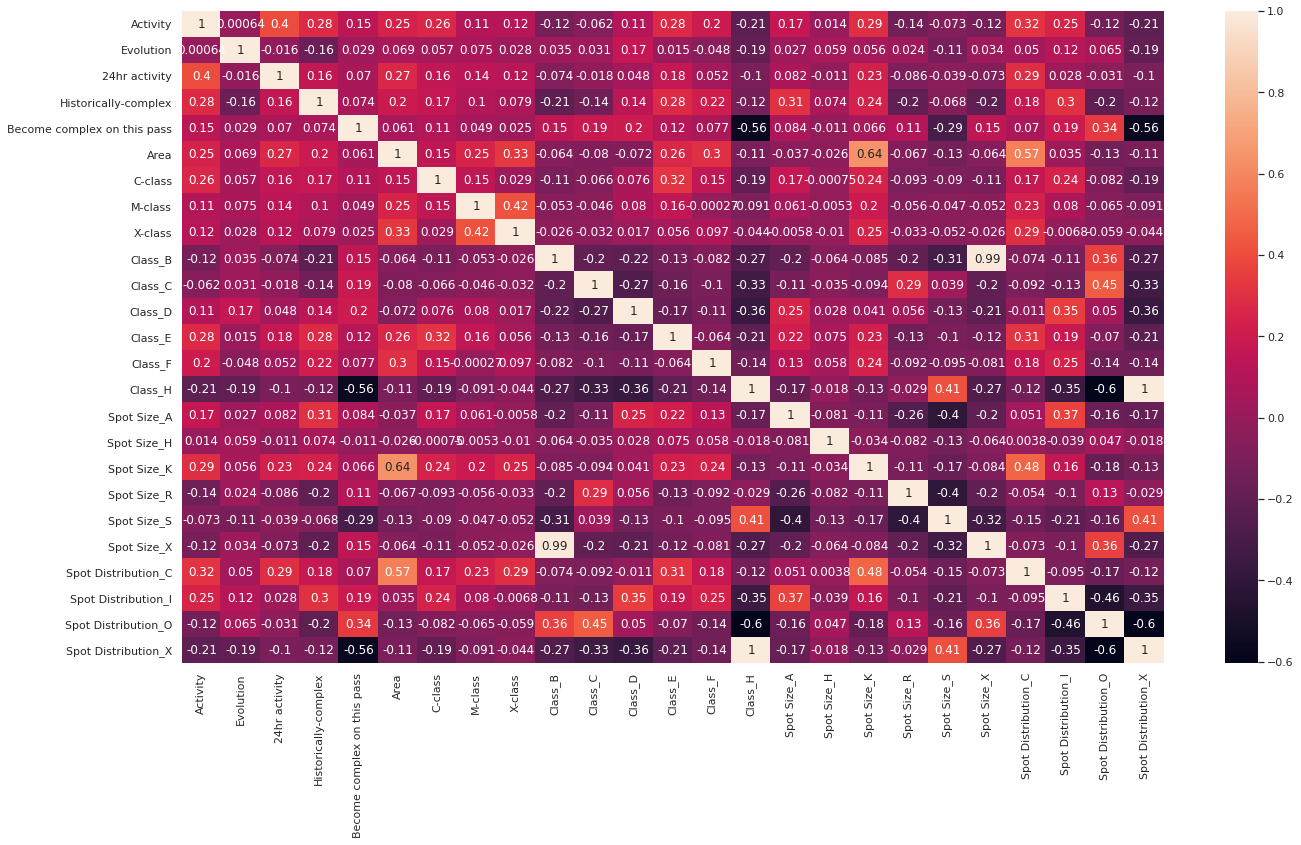

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,12))

import seaborn as sns
sns.set()
sns.heatmap(data=df.corr(), annot=True)

<Figure size 1152x576 with 0 Axes>

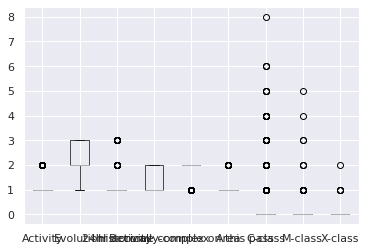

<Figure size 1152x576 with 0 Axes>

In [23]:
df.boxplot(column=['Activity', 'Evolution',
       '24hr activity', 'Historically-complex', 'Become complex on this pass',
       'Area', 'C-class', 'M-class','X-class'])
plt.figure(figsize=(16,8))


In [24]:
df

,Class,Spot Size,Spot Distribution,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,C-class,...,Spot Size_A,Spot Size_H,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X
0,H,A,X,1,3,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,D,R,O,1,3,1,1,2,1,0,...,0,0,0,1,0,0,0,0,1,0
2,C,S,O,1,3,1,1,2,1,0,...,0,0,0,0,1,0,0,0,1,0
3,H,R,X,1,2,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,H,S,X,1,1,1,1,2,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,H,S,X,1,2,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1062,H,S,X,2,2,1,1,2,1,0,...,0,0,0,0,1,0,0,0,0,1
1063,C,S,O,1,2,1,2,2,1,0,...,0,0,0,0,1,0,0,0,1,0
1064,H,R,X,1,2,1,1,2,1,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
X = df[[ 'Activity', 'Evolution',
       '24hr activity', 'Historically-complex', 'Become complex on this pass',
       'Area', 'X-class', 'M-class','Class_B', 'Class_C',
       'Class_D', 'Class_E', 'Class_F', 'Class_H', 'Spot Size_A',
       'Spot Size_H', 'Spot Size_K', 'Spot Size_R', 'Spot Size_S',
       'Spot Size_X', 'Spot Distribution_C', 'Spot Distribution_I',
       'Spot Distribution_O', 'Spot Distribution_X']]


In [26]:
df.loc[df['C-class']!=0, 'C-class'] = 1
y = df['C-class']

In [27]:
X = X.apply(lambda x: (x-x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))

In [28]:
X.describe()

,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,X-class,M-class,Class_B,Class_C,...,Spot Size_A,Spot Size_H,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,...,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,0.153846,0.700750,0.029550,0.404315,0.875235,0.025328,0.002814,0.009381,0.137899,0.197936,...,0.202627,0.025328,0.043152,0.204503,0.388368,0.136023,0.032833,0.209193,0.447467,0.310507
std,0.360971,0.310292,0.160162,0.490989,0.330608,0.157194,0.043244,0.060562,0.344955,0.398631,...,0.402145,0.157194,0.203294,0.403527,0.487608,0.342973,0.178283,0.406924,0.497466,0.462918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.corr()        #Nan for area of largest spot?

,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,C-class,M-class,X-class,Class_B,...,Spot Size_A,Spot Size_H,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X
Activity,1.000000,0.000645,0.400409,0.279160,0.145256,0.245672,0.241846,0.114317,0.122619,-0.117752,...,0.173154,0.014002,0.293309,-0.138842,-0.073044,-0.116099,0.315378,0.253730,-0.122277,-0.213097
Evolution,0.000645,1.000000,-0.015562,-0.160388,0.029288,0.068912,0.076071,0.074575,0.027833,0.034999,...,0.027375,0.059287,0.056050,0.024270,-0.109291,0.034332,0.050474,0.116995,0.065344,-0.192503
24hr activity,0.400409,-0.015562,1.000000,0.164349,0.069692,0.268607,0.118700,0.135960,0.123554,-0.073824,...,0.081890,-0.011108,0.234762,-0.086326,-0.038878,-0.073241,0.294828,0.027524,-0.030584,-0.104874
Historically-complex,0.279160,-0.160388,0.164349,1.000000,0.073891,0.195669,0.164669,0.099685,0.079030,-0.207532,...,0.307528,0.074011,0.238953,-0.199713,-0.068190,-0.204223,0.180735,0.304715,-0.203202,-0.119095
Become complex on this pass,0.145256,0.029288,0.069692,0.073891,1.000000,0.060864,0.118503,0.049131,0.024583,0.151003,...,0.084391,-0.011407,0.066209,0.114012,-0.293252,0.149809,0.069565,0.194189,0.339771,-0.562619
Area,0.245672,0.068912,0.268607,0.195669,0.060864,1.000000,0.164866,0.251184,0.334833,-0.064473,...,-0.036702,-0.025987,0.641564,-0.066932,-0.128455,-0.063963,0.573381,0.034522,-0.133062,-0.108179
C-class,0.241846,0.076071,0.118700,0.164669,0.118503,0.164866,1.000000,0.127372,0.085816,-0.109166,...,0.155816,0.022060,0.234910,-0.087893,-0.085338,-0.107313,0.140246,0.263122,-0.072396,-0.207509
M-class,0.114317,0.074575,0.135960,0.099685,0.049131,0.251184,0.127372,1.000000,0.420147,-0.052990,...,0.060673,-0.005255,0.195884,-0.055520,-0.047176,-0.052448,0.232339,0.080319,-0.064660,-0.090599
X-class,0.122619,0.027833,0.123554,0.079030,0.024583,0.334833,0.085816,0.420147,1.000000,-0.026040,...,-0.005825,-0.010496,0.253193,-0.033012,-0.051883,-0.025835,0.292484,-0.006808,-0.058593,-0.043693
Class_B,-0.117752,0.034999,-0.073824,-0.207532,0.151003,-0.064473,-0.109166,-0.052990,-0.026040,1.000000,...,-0.201613,-0.064473,-0.084934,-0.202783,-0.307532,0.992095,-0.073689,-0.105364,0.362350,-0.268393


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

   # log regression when classification, linear regression when continous target 

In [31]:
#decison tree, randomforest, SVM, Naive-bayes, NN all apply to linear and log regression

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [33]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [36]:
y_pred = model.predict(X_test)
# y_pred

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))   #(tn, fp, fn, tp)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[257  14]
 [ 41   8]]


0.828125

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       271
           1       0.36      0.16      0.23        49

    accuracy                           0.83       320
   macro avg       0.61      0.56      0.56       320
weighted avg       0.79      0.83      0.80       320



In [39]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,15,2):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    print('With', i ,'neighbors accuracy is', accuracy_score(y_test, y_pred))
    
## Note: Even with different neighbors, the accuracy remained constant.
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

With 3 neighbors accuracy is 0.828125
With 5 neighbors accuracy is 0.828125
With 7 neighbors accuracy is 0.828125
With 9 neighbors accuracy is 0.828125
With 11 neighbors accuracy is 0.828125
With 13 neighbors accuracy is 0.828125


In [40]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print('accuracy is', accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))

accuracy is 0.828125
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       271
           1       0.36      0.16      0.23        49

    accuracy                           0.83       320
   macro avg       0.61      0.56      0.56       320
weighted avg       0.79      0.83      0.80       320



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_list = [RandomForestClassifier, DecisionTreeClassifier, GaussianNB]
l_models = []
l_acc = []
for model in model_list:
    print(model,'STARTED' )
    model1 = model().fit(X_train, y_train)
    l_models.append(model1)
    y_pred = model1.predict(X_test)
    print('accuracy of',model,'is', accuracy_score(y_test, y_pred))
    l_acc.append(accuracy_score(y_test, y_pred))

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.790625
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.784375
<class 'sklearn.naive_bayes.GaussianNB'> STARTED
accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.80625


In [43]:
df.columns

Index(['Class', 'Spot Size', 'Spot Distribution', 'Activity', 'Evolution',
       '24hr activity', 'Historically-complex', 'Become complex on this pass',
       'Area', 'C-class', 'M-class', 'X-class', 'Class_B', 'Class_C',
       'Class_D', 'Class_E', 'Class_F', 'Class_H', 'Spot Size_A',
       'Spot Size_H', 'Spot Size_K', 'Spot Size_R', 'Spot Size_S',
       'Spot Size_X', 'Spot Distribution_C', 'Spot Distribution_I',
       'Spot Distribution_O', 'Spot Distribution_X'],
      dtype='object')

In [44]:
X_train.columns

Index(['Activity', 'Evolution', '24hr activity', 'Historically-complex',
       'Become complex on this pass', 'Area', 'X-class', 'M-class', 'Class_B',
       'Class_C', 'Class_D', 'Class_E', 'Class_F', 'Class_H', 'Spot Size_A',
       'Spot Size_H', 'Spot Size_K', 'Spot Size_R', 'Spot Size_S',
       'Spot Size_X', 'Spot Distribution_C', 'Spot Distribution_I',
       'Spot Distribution_O', 'Spot Distribution_X'],
      dtype='object')

# We are going to create clusters of the non important columns

In [45]:
X.shape

(1066, 24)

In [46]:
X

,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,X-class,M-class,Class_B,Class_C,...,Spot Size_A,Spot Size_H,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1062,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1063,0.0,0.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1064,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(X, y)
print(selector.support_)

print(selector.ranking_)

[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True]
[ 7  6  4  5  8  9  3 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1]


In [48]:
Imp_Columns = []

for i in [i for i, e in enumerate(list(selector.ranking_)) if e == 1]:
    Imp_Columns.append(X.columns[i])


In [49]:
Non_Imp = [i for i in X.columns if i not in Imp_Columns]

In [50]:
Not_imp_df = df[Non_Imp]

In [51]:
## Apply K means algorithm 

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(Not_imp_df)
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [53]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

1) Build a Model with all the imp columns and check all the results.
2) Create a new column 'CLUSTERS'.:::        X['Clusters'] = kmeans.labels_
3) Build Models again..

In [54]:
Imp_df=X[Imp_Columns]

In [55]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(Not_imp_df)
Imp_df['Clusters']=kmeans.labels_
kmeans.labels_

/home/q/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

# Clustered all non-important columns to 3 clusters, using these clusters as a feature. 

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Imp_df,y,test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [58]:
y_pred = model.predict(X_test)
# y_pred

In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))   #(tn, fp, fn, tp)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[260  11]
 [ 41   8]]


0.8375

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       271
           1       0.42      0.16      0.24        49

    accuracy                           0.84       320
   macro avg       0.64      0.56      0.57       320
weighted avg       0.80      0.84      0.81       320



In [61]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,15,2):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    print('With', i ,'neighbors accuracy is', accuracy_score(y_test, y_pred))

With 3 neighbors accuracy is 0.8375
With 5 neighbors accuracy is 0.8375
With 7 neighbors accuracy is 0.8375
With 9 neighbors accuracy is 0.8375
With 11 neighbors accuracy is 0.8375
With 13 neighbors accuracy is 0.8375


In [62]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print('accuracy is', accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))

accuracy is 0.8375
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       271
           1       0.42      0.16      0.24        49

    accuracy                           0.84       320
   macro avg       0.64      0.56      0.57       320
weighted avg       0.80      0.84      0.81       320



In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [64]:
model_list = [RandomForestClassifier, DecisionTreeClassifier, GaussianNB]
l_models = []
l_acc = []
for model in model_list:
    print(model,'STARTED' )
    model1 = model().fit(X_train, y_train)
    l_models.append(model1)
    y_pred = model1.predict(X_test)
    print('accuracy of',model,'is', accuracy_score(y_test, y_pred))
    l_acc.append(accuracy_score(y_test, y_pred))

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.815625
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.809375
<class 'sklearn.naive_bayes.GaussianNB'> STARTED
accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.75


#before clustering

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.79375
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.784375
<class 'sklearn.naive_bayes.GaussianNB'> STARTED
accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.80625

In [65]:
# only model that improved was decision tree classifier

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
silhouette_score(Imp_df, kmeans.labels_, metric='euclidean', sample_size=None, random_state=42)


0.2024729137806189

In [68]:
#Silhoutte score is low, not good.  clusters are overlapping.

In [69]:
from yellowbrick.cluster import KElbowVisualizer


/home/q/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/home/q/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/q/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


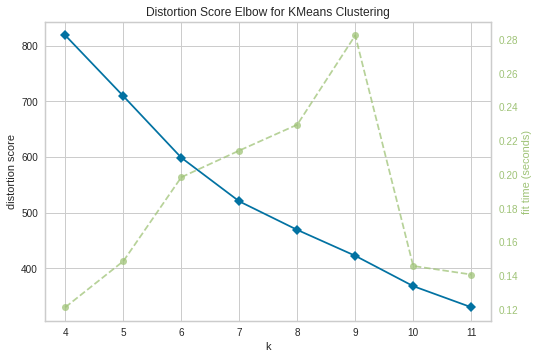

In [70]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(Not_imp_df)        # Fit the data to the visualizer
visualizer.show()                 # Finalize and render the figure

# Increase clusters to 6

In [71]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(Not_imp_df)
Imp_df['Clusters']=kmeans.labels_
kmeans.labels_

/home/q/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 4, 4, ..., 0, 3, 2], dtype=int32)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Imp_df,y,test_size=0.3, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [74]:
y_pred = model.predict(X_test)
# y_pred

In [75]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))   #(tn, fp, fn, tp)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[259  12]
 [ 41   8]]


0.834375

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       271
           1       0.40      0.16      0.23        49

    accuracy                           0.83       320
   macro avg       0.63      0.56      0.57       320
weighted avg       0.79      0.83      0.80       320



In [77]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,15,2):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    print('With', i ,'neighbors accuracy is', accuracy_score(y_test, y_pred))

With 3 neighbors accuracy is 0.834375
With 5 neighbors accuracy is 0.834375
With 7 neighbors accuracy is 0.834375
With 9 neighbors accuracy is 0.834375
With 11 neighbors accuracy is 0.834375
With 13 neighbors accuracy is 0.834375


In [78]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print('accuracy is', accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))

accuracy is 0.834375
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       271
           1       0.40      0.16      0.23        49

    accuracy                           0.83       320
   macro avg       0.63      0.56      0.57       320
weighted avg       0.79      0.83      0.80       320



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [80]:
model_list = [RandomForestClassifier, DecisionTreeClassifier, GaussianNB]
l_models = []
l_acc = []
for model in model_list:
    print(model,'STARTED' )
    model1 = model().fit(X_train, y_train)
    l_models.append(model1)
    y_pred = model1.predict(X_test)
    print('accuracy of',model,'is', accuracy_score(y_test, y_pred))
    l_acc.append(accuracy_score(y_test, y_pred))

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.815625
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.809375
<class 'sklearn.naive_bayes.GaussianNB'> STARTED
accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.746875


In [81]:
silhouette_score(Imp_df, kmeans.labels_, metric='euclidean', sample_size=None, random_state=42)

0.29442744443912555

/home/q/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/q/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


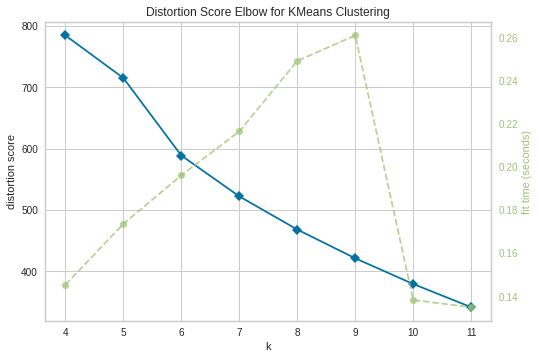

In [82]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(Not_imp_df)        # Fit the data to the visualizer
visualizer.show()                 # Finalize and render the figure

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.796875
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.809375
<class 'sklearn.naive_bayes.GaussianNB'> STARTED
accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.75

# converting non-important columns to PCA

In [83]:
from sklearn.decomposition import PCA


In [84]:
pca = PCA(n_components=5)
pca.fit(Not_imp_df)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
sum(pca.explained_variance_ratio_)


0.8704172190565858

In [86]:
pca.transform(Not_imp_df)

array([[-0.5479505 ,  0.35224145, -0.88339888,  0.00777714, -0.10598101],
       [-0.83863127, -0.37710709,  0.15978925, -0.0201795 , -0.01450734],
       [-0.83863127, -0.37710709,  0.15978925, -0.0201795 , -0.01450734],
       ...,
       [ 0.41374472, -0.28063762,  0.61642938, -0.4682573 ,  0.00769512],
       [ 0.30118224, -0.17901782, -0.53065922,  0.19254282,  0.0574119 ],
       [ 0.9454447 , -1.23780963,  0.04416318,  0.1966861 ,  0.09264655]])

In [87]:
transformed = pd.DataFrame(pca.transform(Not_imp_df), columns = ['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5'])

In [88]:
Imp_df['Pc1'] = transformed['Pc1']
Imp_df['Pc2'] = transformed['Pc2']
Imp_df['Pc3'] = transformed['Pc3']
Imp_df['Pc4'] = transformed['Pc4']
Imp_df['Pc5'] = transformed['Pc5']

/home/q/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/q/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/q/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [89]:
Imp_df ## We have replaced all the non imp columns by PCA.

,Class_B,Class_C,Class_D,Class_E,Class_F,Class_H,Spot Size_A,Spot Size_H,Spot Size_K,Spot Size_R,...,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_X,Clusters,Pc1,Pc2,Pc3,Pc4,Pc5
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,-0.547950,0.352241,-0.883399,0.007777,-0.105981
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4,-0.838631,-0.377107,0.159789,-0.020179,-0.014507
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,-0.838631,-0.377107,0.159789,-0.020179,-0.014507
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,3,0.344087,-0.078110,-0.941212,0.116210,-0.052404
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3,1.193220,-0.609369,-0.588472,0.300976,0.110989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3,0.344087,-0.078110,-0.941212,0.116210,-0.052404
1062,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3,0.390218,0.107836,-0.216860,0.784569,-0.239256
1063,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.413745,-0.280638,0.616429,-0.468257,0.007695
1064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,3,0.301182,-0.179018,-0.530659,0.192543,0.057412


# train test split again, and build all the models and evaluate results.


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Imp_df,y,test_size=0.3, random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [92]:
y_pred = model.predict(X_test)
# y_pred

In [93]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))   #(tn, fp, fn, tp)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[257  14]
 [ 42   7]]


0.825

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       271
           1       0.33      0.14      0.20        49

    accuracy                           0.82       320
   macro avg       0.60      0.55      0.55       320
weighted avg       0.78      0.82      0.79       320



In [95]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,15,2):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    print('With', i ,'neighbors accuracy is', accuracy_score(y_test, y_pred))

With 3 neighbors accuracy is 0.825
With 5 neighbors accuracy is 0.825
With 7 neighbors accuracy is 0.825
With 9 neighbors accuracy is 0.825
With 11 neighbors accuracy is 0.825
With 13 neighbors accuracy is 0.825


In [96]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print('accuracy is', accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))

accuracy is 0.825
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       271
           1       0.33      0.14      0.20        49

    accuracy                           0.82       320
   macro avg       0.60      0.55      0.55       320
weighted avg       0.78      0.82      0.79       320



In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [98]:
model_list = [RandomForestClassifier, DecisionTreeClassifier, GaussianNB]
l_models = []
l_acc = []
for model in model_list:
    print(model,'STARTED' )
    model1 = model().fit(X_train, y_train)
    l_models.append(model1)
    y_pred = model1.predict(X_test)
    print('accuracy of',model,'is', accuracy_score(y_test, y_pred))
    l_acc.append(accuracy_score(y_test, y_pred))

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.78125
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.8
<class 'sklearn.naive_bayes.GaussianNB'> STARTED
accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.7625


In [99]:
silhouette_score(Imp_df, kmeans.labels_, metric='euclidean', sample_size=None, random_state=42)

0.33984805554070785

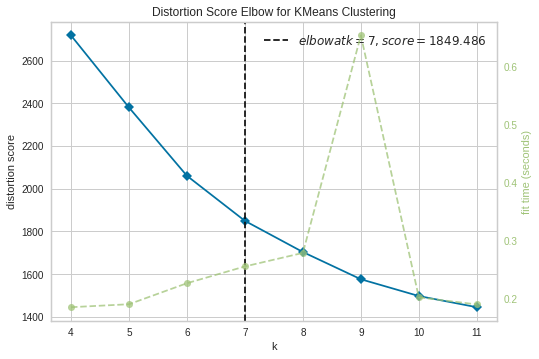

In [100]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(Imp_df)        # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

###PCA

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.784375
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.7875
<class 'sklearn.naive_bayes.GaussianNB'> STARTED
accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.7625

###Before Clusters

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.79375 <class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.784375 <class 'sklearn.naive_bayes.GaussianNB'> STARTED accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.80625

###with clusters

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.796875 <class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.809375 <class 'sklearn.naive_bayes.GaussianNB'> STARTED accuracy of <class 'sklearn.naive_bayes.GaussianNB'> is 0.75

# PyCaret

In [167]:
Z = df[[ 'Activity', 'Evolution',
       '24hr activity', 'Historically-complex', 'Become complex on this pass',
       'Area', 'X-class','C-class', 'M-class','Class_B', 'Class_C',
       'Class_D', 'Class_E', 'Class_F', 'Class_H', 'Spot Size_A',
       'Spot Size_H', 'Spot Size_K', 'Spot Size_R', 'Spot Size_S',
       'Spot Size_X', 'Spot Distribution_C', 'Spot Distribution_I',
       'Spot Distribution_O', 'Spot Distribution_X']]

In [168]:
from pycaret.classification import *


In [169]:
data = Z.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = Z.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1013, 25)
Unseen Data For Predictions: (53, 25)


In [104]:
df2 = setup(data = data, target = 'C-class', session_id=123) 


 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1013, 25)"
4,Missing Values,False
5,Numeric Features,16
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [105]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.826500,0.738800,0.173100,0.552100,0.251100,0.181400
1,Ridge Classifier,0.825100,0.000000,0.148700,0.483300,0.218900,0.154500
2,Ada Boost Classifier,0.815300,0.721500,0.156400,0.477900,0.223500,0.144200
3,Gradient Boosting Classifier,0.808200,0.691500,0.156400,0.324500,0.201200,0.119200
4,Light Gradient Boosting Machine,0.808200,0.688700,0.172400,0.329400,0.220400,0.134200
5,K Neighbors Classifier,0.806800,0.663200,0.107100,0.261700,0.151100,0.075300
6,Random Forest Classifier,0.804000,0.671100,0.196800,0.378300,0.249700,0.152600
7,Extra Trees Classifier,0.804000,0.641900,0.164100,0.289500,0.207200,0.119300
8,CatBoost Classifier,0.804000,0.663900,0.162800,0.334000,0.211500,0.121000
9,Naive Bayes,0.802600,0.731700,0.330800,0.406000,0.344700,0.235400


In [106]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7887,0.5749,0.1538,0.3333,0.2105,0.1073
1,0.7746,0.4901,0.1538,0.2857,0.2000,0.0824
2,0.7465,0.4633,0.0833,0.1250,0.1000,-0.0407
3,0.8028,0.6723,0.2500,0.3750,0.3000,0.1906
4,0.8169,0.4802,0.0833,0.3333,0.1333,0.0705
5,0.8451,0.5706,0.2500,0.6000,0.3529,0.2815
6,0.8028,0.6758,0.2500,0.3750,0.3000,0.1906
7,0.8310,0.5932,0.2500,0.5000,0.3333,0.2487
8,0.7746,0.6575,0.2500,0.3000,0.2727,0.1407
9,0.8000,0.6458,0.0833,0.2500,0.1250,0.0430


In [107]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.6790,0.1538,0.5000,0.2353,0.1632
1,0.7465,0.5511,0.0000,0.0000,0.0000,-0.1132
2,0.7887,0.6511,0.0000,0.0000,0.0000,-0.0725
3,0.8028,0.7669,0.1667,0.3333,0.2222,0.1235
4,0.8169,0.7422,0.0000,0.0000,0.0000,-0.0267
5,0.8451,0.4951,0.2500,0.6000,0.3529,0.2815
6,0.8451,0.7189,0.2500,0.6000,0.3529,0.2815
7,0.8028,0.6441,0.1667,0.3333,0.2222,0.1235
8,0.8028,0.7027,0.0833,0.2500,0.1250,0.0442
9,0.8000,0.6810,0.0000,0.0000,0.0000,-0.0515


In [108]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.6313,0.2308,0.5000,0.3158,0.2263
1,0.7465,0.5179,0.1538,0.2222,0.1818,0.0377
2,0.8028,0.5939,0.1667,0.3333,0.2222,0.1235
3,0.7887,0.7507,0.3333,0.3636,0.3478,0.2221
4,0.8028,0.6857,0.0833,0.2500,0.1250,0.0442
5,0.8169,0.6003,0.1667,0.4000,0.2353,0.1509
6,0.8169,0.7415,0.2500,0.4286,0.3158,0.2185
7,0.7887,0.6575,0.1667,0.2857,0.2105,0.0982
8,0.8310,0.7302,0.3333,0.5000,0.4000,0.3062
9,0.8286,0.8017,0.0833,0.5000,0.1429,0.0987


In [109]:
tuned_dt = tune_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.6996,0.0000,0.0000,0.0000,0.0000
1,0.7465,0.5471,0.1538,0.2222,0.1818,0.0377
2,0.7887,0.5953,0.0833,0.2000,0.1176,0.0202
3,0.7887,0.8192,0.1667,0.2857,0.2105,0.0982
4,0.8451,0.7966,0.2500,0.6000,0.3529,0.2815
5,0.7887,0.5636,0.1667,0.2857,0.2105,0.0982
6,0.8169,0.7684,0.1667,0.4000,0.2353,0.1509
7,0.8169,0.6370,0.0833,0.3333,0.1333,0.0705
8,0.7887,0.7232,0.2500,0.3333,0.2857,0.1647
9,0.8286,0.7299,0.2500,0.5000,0.3333,0.2473


In [110]:
tuned_knn = tune_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8310,0.6996,0.0769,1.0000,0.1429,0.1198
1,0.7887,0.5497,0.0000,0.0000,0.0000,-0.0513
2,0.8169,0.6660,0.0000,0.0000,0.0000,-0.0267
3,0.8310,0.8376,0.0000,0.0000,0.0000,0.0000
4,0.8310,0.8114,0.0000,0.0000,0.0000,0.0000
5,0.8310,0.5727,0.0000,0.0000,0.0000,0.0000
6,0.8169,0.8743,0.0000,0.0000,0.0000,-0.0267
7,0.8310,0.7465,0.0000,0.0000,0.0000,0.0000
8,0.8451,0.7775,0.0833,1.0000,0.1538,0.1313
9,0.8429,0.8168,0.0833,1.0000,0.1538,0.1309


In [111]:
tuned_rf = tune_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.7255,0.1538,0.5000,0.2353,0.1632
1,0.7606,0.5796,0.0000,0.0000,0.0000,-0.0943
2,0.8169,0.6758,0.0000,0.0000,0.0000,-0.0267
3,0.8310,0.8411,0.0000,0.0000,0.0000,0.0000
4,0.8310,0.7669,0.0000,0.0000,0.0000,0.0000
5,0.8451,0.5191,0.0833,1.0000,0.1538,0.1313
6,0.8451,0.8616,0.1667,0.6667,0.2667,0.2135
7,0.8592,0.7966,0.1667,1.0000,0.2857,0.2495
8,0.8169,0.7175,0.0833,0.3333,0.1333,0.0705
9,0.8429,0.8261,0.0833,1.0000,0.1538,0.1309


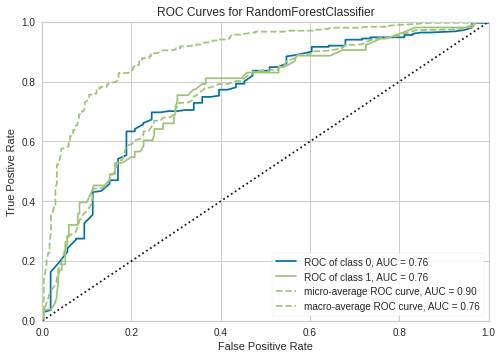

In [112]:
plot_model(tuned_rf, plot = 'auc')


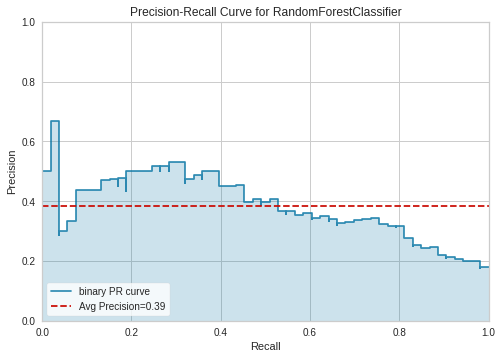

In [113]:
plot_model(tuned_rf, plot = 'pr')


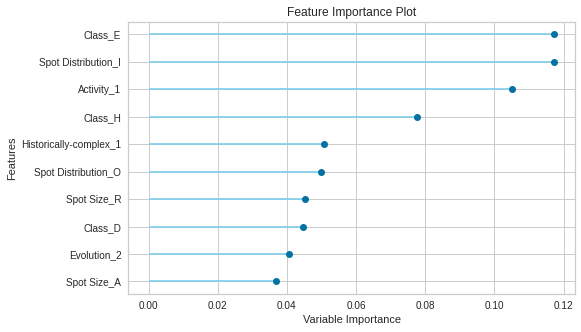

In [114]:
plot_model(tuned_rf, plot='feature')


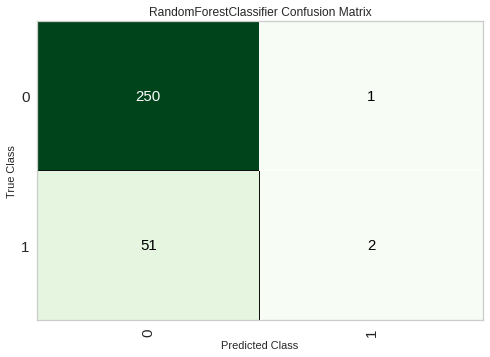

In [115]:
plot_model(tuned_rf, plot = 'confusion_matrix')


In [116]:
evaluate_model(tuned_rf)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [117]:
predict_model(tuned_rf);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8289,0.7565,0.0377,0.6667,0.0714,0.0538


In [118]:
final_rf = finalize_model(tuned_rf)


In [119]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [120]:
predict_model(final_rf);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8618,0.8354,0.2642,0.8235,0.4,0.3445


In [121]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,X-class,C-class,M-class,Class_B,...,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X,Label,Score
0,1,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0998
1,1,3,1,1,2,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0.0992
2,1,3,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.0698
3,1,3,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.1757
4,1,3,1,2,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0986


In [122]:
save_model(final_rf,'Final RF Model 21May2020')


Transformation Pipeline and Model Succesfully Saved


In [123]:
saved_final_rf = load_model('Final RF Model 21May2020')


Transformation Pipeline and Model Sucessfully Loaded


In [124]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)


In [125]:
new_prediction.head()


,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,X-class,C-class,M-class,Class_B,...,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X,Label,Score
0,1,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0998
1,1,3,1,1,2,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0.0992
2,1,3,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.0698
3,1,3,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.1757
4,1,3,1,2,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0986


In [156]:
data = Z.sample(frac=0.95, random_state=786)
data_unseen = Z.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1013, 25)
Unseen Data For Predictions (53, 25)


In [177]:
from pycaret.classification import *


In [192]:

df3 = setup(data = data, target = 'C-class', session_id=123)
               #  normalize = True, 
               #  transformation = True, 
               #  ignore_low_variance = True,
               #  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
               #  bin_numeric_features = ['Activity', 'Evolution'])
                # group_features = [['Class_B', 'Class_C',
       #'Class_D', 'Class_E', 'Class_F', 'Class_H'],[ 'Spot Size_A',
       #'Spot Size_H', 'Spot Size_K', 'Spot Size_R', 'Spot Size_S',
       #'Spot Size_X'],[ 'Spot Distribution_C', 'Spot Distribution_I',
       #'Spot Distribution_O', 'Spot Distribution_X']])





 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1013, 25)"
4,Missing Values,False
5,Numeric Features,16
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [193]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.826500,0.738800,0.173100,0.552100,0.251100,0.181400
1,Ridge Classifier,0.825100,0.000000,0.148700,0.483300,0.218900,0.154500
2,Ada Boost Classifier,0.815300,0.721500,0.156400,0.477900,0.223500,0.144200
3,Gradient Boosting Classifier,0.808200,0.691500,0.156400,0.324500,0.201200,0.119200
4,Light Gradient Boosting Machine,0.808200,0.688700,0.172400,0.329400,0.220400,0.134200
5,K Neighbors Classifier,0.806800,0.663200,0.107100,0.261700,0.151100,0.075300
6,Random Forest Classifier,0.804000,0.671100,0.196800,0.378300,0.249700,0.152600
7,Extra Trees Classifier,0.804000,0.641900,0.164100,0.289500,0.207200,0.119300
8,CatBoost Classifier,0.804000,0.663900,0.162800,0.334000,0.211500,0.121000
9,Naive Bayes,0.802600,0.731700,0.330800,0.406000,0.344700,0.235400


In [194]:
dt = create_model('dt', fold = 5)


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7817,0.5291,0.2000,0.3125,0.2439,0.1235
1,0.7817,0.5720,0.1200,0.2500,0.1622,0.0541
2,0.8028,0.5860,0.0417,0.1667,0.0667,-0.0010
3,0.8169,0.6561,0.2083,0.4167,0.2778,0.1861
4,0.7943,0.7242,0.2917,0.3684,0.3256,0.2062
Mean,0.7955,0.6135,0.1723,0.3029,0.2152,0.1138
SD,0.0134,0.0688,0.0850,0.0880,0.0914,0.0782


In [195]:
dt = create_model('dt', fold = 5, round = 2)


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.78,0.53,0.20,0.31,0.24,0.12
1,0.78,0.57,0.12,0.25,0.16,0.05
2,0.80,0.59,0.04,0.17,0.07,-0.00
3,0.82,0.66,0.21,0.42,0.28,0.19
4,0.79,0.72,0.29,0.37,0.33,0.21
Mean,0.80,0.61,0.17,0.30,0.22,0.11
SD,0.01,0.07,0.08,0.09,0.09,0.08


In [196]:
tuned_rf = tune_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.7255,0.1538,0.5000,0.2353,0.1632
1,0.7606,0.5796,0.0000,0.0000,0.0000,-0.0943
2,0.8169,0.6758,0.0000,0.0000,0.0000,-0.0267
3,0.8310,0.8411,0.0000,0.0000,0.0000,0.0000
4,0.8310,0.7669,0.0000,0.0000,0.0000,0.0000
5,0.8451,0.5191,0.0833,1.0000,0.1538,0.1313
6,0.8451,0.8616,0.1667,0.6667,0.2667,0.2135
7,0.8592,0.7966,0.1667,1.0000,0.2857,0.2495
8,0.8169,0.7175,0.0833,0.3333,0.1333,0.0705
9,0.8429,0.8261,0.0833,1.0000,0.1538,0.1309


In [197]:
tuned_rf2 = tune_model('rf', optimize = 'AUC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.7255,0.1538,0.5000,0.2353,0.1632
1,0.7606,0.5796,0.0000,0.0000,0.0000,-0.0943
2,0.8169,0.6758,0.0000,0.0000,0.0000,-0.0267
3,0.8310,0.8411,0.0000,0.0000,0.0000,0.0000
4,0.8310,0.7669,0.0000,0.0000,0.0000,0.0000
5,0.8451,0.5191,0.0833,1.0000,0.1538,0.1313
6,0.8451,0.8616,0.1667,0.6667,0.2667,0.2135
7,0.8592,0.7966,0.1667,1.0000,0.2857,0.2495
8,0.8169,0.7175,0.0833,0.3333,0.1333,0.0705
9,0.8429,0.8261,0.0833,1.0000,0.1538,0.1309


In [198]:
#tuned_rf optimize parameter set to the default 'Accuracy'
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,70
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


In [199]:
#tuned_rf optimize parameter set to 'AUC'
plot_model(tuned_rf2, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,70
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


In [200]:
# create a simple decision tree model to use for ensembling 
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7887,0.5749,0.1538,0.3333,0.2105,0.1073
1,0.7746,0.4901,0.1538,0.2857,0.2000,0.0824
2,0.7465,0.4633,0.0833,0.1250,0.1000,-0.0407
3,0.8028,0.6723,0.2500,0.3750,0.3000,0.1906
4,0.8169,0.4802,0.0833,0.3333,0.1333,0.0705
5,0.8451,0.5706,0.2500,0.6000,0.3529,0.2815
6,0.8028,0.6758,0.2500,0.3750,0.3000,0.1906
7,0.8310,0.5932,0.2500,0.5000,0.3333,0.2487
8,0.7746,0.6575,0.2500,0.3000,0.2727,0.1407
9,0.8000,0.6458,0.0833,0.2500,0.1250,0.0430


In [201]:
bagged_dt = ensemble_model(dt)


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8028,0.6366,0.2308,0.4286,0.3000,0.1971
1,0.7183,0.5245,0.1538,0.1818,0.1667,-0.0014
2,0.7465,0.5819,0.0833,0.1250,0.1000,-0.0407
3,0.7887,0.7500,0.3333,0.3636,0.3478,0.2221
4,0.8310,0.7422,0.2500,0.5000,0.3333,0.2487
5,0.8310,0.5777,0.1667,0.5000,0.2500,0.1808
6,0.8169,0.7592,0.2500,0.4286,0.3158,0.2185
7,0.7887,0.6660,0.2500,0.3333,0.2857,0.1647
8,0.8169,0.6942,0.3333,0.4444,0.3810,0.2761
9,0.8143,0.7399,0.0833,0.3333,0.1333,0.0695


In [202]:
# check the parameters of bagged_dt
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [203]:
#boosting
boosted_dt = ensemble_model(dt, method = 'Boosting')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.6220,0.3846,0.5000,0.4348,0.3277
1,0.7183,0.4516,0.2308,0.2308,0.2308,0.0584
2,0.7465,0.4428,0.0000,0.0000,0.0000,-0.1270
3,0.8028,0.6292,0.2500,0.3750,0.3000,0.1906
4,0.8310,0.5586,0.0833,0.5000,0.1429,0.0994
5,0.8592,0.6158,0.2500,0.7500,0.3750,0.3173
6,0.8028,0.5381,0.2500,0.3750,0.3000,0.1906
7,0.8310,0.5734,0.2500,0.5000,0.3333,0.2487
8,0.7887,0.6278,0.2500,0.3333,0.2857,0.1647
9,0.8571,0.7421,0.1667,1.0000,0.2857,0.2489


In [204]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7887,0.6485,0.1538,0.3333,0.2105,0.1073
1,0.7324,0.5126,0.1538,0.2000,0.1739,0.0175
2,0.7606,0.5629,0.0833,0.1429,0.1053,-0.0220
3,0.7746,0.7451,0.2500,0.3000,0.2727,0.1407
4,0.8028,0.7338,0.0833,0.2500,0.1250,0.0442
5,0.8310,0.5650,0.1667,0.5000,0.2500,0.1808
6,0.8169,0.7627,0.2500,0.4286,0.3158,0.2185
7,0.7887,0.6511,0.2500,0.3333,0.2857,0.1647
8,0.7887,0.7140,0.3333,0.3636,0.3478,0.2221
9,0.8143,0.7902,0.0833,0.3333,0.1333,0.0695


In [205]:
tuned_bagged_dt = tune_model('dt', ensemble=True, method='Bagging')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.7374,0.1538,0.5000,0.2353,0.1632
1,0.7887,0.5597,0.0769,0.2500,0.1176,0.0345
2,0.7746,0.6335,0.0000,0.0000,0.0000,-0.0923
3,0.8169,0.8171,0.0000,0.0000,0.0000,-0.0267
4,0.8310,0.7754,0.0000,0.0000,0.0000,0.0000
5,0.8310,0.5487,0.0833,0.5000,0.1429,0.0994
6,0.8310,0.8644,0.2500,0.5000,0.3333,0.2487
7,0.8451,0.7825,0.1667,0.6667,0.2667,0.2135
8,0.8310,0.6780,0.0833,0.5000,0.1429,0.0994
9,0.8429,0.8405,0.0833,1.0000,0.1538,0.1309


In [206]:
# check the parameters of the tuned Decision Tree with bagging
print(tuned_bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=6,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [207]:
#blending
blend_hard = blend_models()


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7887,0.0,0.0769,0.2500,0.1176,0.0345
1,0.7746,0.0,0.0769,0.2000,0.1111,0.0105
2,0.7746,0.0,0.0833,0.1667,0.1111,-0.0018
3,0.7887,0.0,0.0000,0.0000,0.0000,-0.0725
4,0.8451,0.0,0.0833,1.0000,0.1538,0.1313
5,0.8451,0.0,0.2500,0.6000,0.3529,0.2815
6,0.8592,0.0,0.4167,0.6250,0.5000,0.4218
7,0.8169,0.0,0.2500,0.4286,0.3158,0.2185
8,0.8310,0.0,0.1667,0.5000,0.2500,0.1808
9,0.8286,0.0,0.0833,0.5000,0.1429,0.0987


In [208]:
blend_soft = blend_models(method = 'soft')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8310,0.7427,0.3077,0.5714,0.4000,0.3118
1,0.7465,0.4920,0.0769,0.1429,0.1000,-0.0323
2,0.7746,0.6194,0.0833,0.1667,0.1111,-0.0018
3,0.8028,0.7903,0.1667,0.3333,0.2222,0.1235
4,0.7887,0.7514,0.0833,0.2000,0.1176,0.0202
5,0.8310,0.5304,0.1667,0.5000,0.2500,0.1808
6,0.8310,0.8814,0.4167,0.5000,0.4545,0.3555
7,0.8028,0.7797,0.2500,0.3750,0.3000,0.1906
8,0.8028,0.7429,0.2500,0.3750,0.3000,0.1906
9,0.8286,0.8075,0.0833,0.5000,0.1429,0.0987


In [209]:
"""
we will create 4 specific models to be passed into blend_models().
Note that verbose is set to False to avoid printing the score grid of individual models.
"""

gbc = create_model('gbc', verbose = False)
dt = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [210]:
blend_specific_soft = blend_models(estimator_list = [gbc,dt, lightgbm, xgboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.7029,0.2308,0.5000,0.3158,0.2263
1,0.7887,0.5451,0.0769,0.2500,0.1176,0.0345
2,0.7746,0.6066,0.0833,0.1667,0.1111,-0.0018
3,0.7887,0.7818,0.0833,0.2000,0.1176,0.0202
4,0.8169,0.7500,0.0833,0.3333,0.1333,0.0705
5,0.8451,0.5473,0.2500,0.6000,0.3529,0.2815
6,0.8310,0.7698,0.3333,0.5000,0.4000,0.3062
7,0.8028,0.7175,0.2500,0.3750,0.3000,0.1906
8,0.7887,0.7133,0.3333,0.3636,0.3478,0.2221
9,0.7857,0.8089,0.0000,0.0000,0.0000,-0.0736


In [211]:
blend_specific_hard = blend_models(estimator_list = [gbc, dt, lightgbm, xgboost], method = 'hard')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7887,0.0,0.0769,0.2500,0.1176,0.0345
1,0.7887,0.0,0.0769,0.2500,0.1176,0.0345
2,0.7746,0.0,0.0833,0.1667,0.1111,-0.0018
3,0.7887,0.0,0.0000,0.0000,0.0000,-0.0725
4,0.8310,0.0,0.0833,0.5000,0.1429,0.0994
5,0.8451,0.0,0.2500,0.6000,0.3529,0.2815
6,0.8310,0.0,0.3333,0.5000,0.4000,0.3062
7,0.8169,0.0,0.2500,0.4286,0.3158,0.2185
8,0.8169,0.0,0.0833,0.3333,0.1333,0.0705
9,0.8143,0.0,0.0000,0.0000,0.0000,-0.0271


In [212]:
#stacking
stack_soft = stack_models([gbc, dt, lightgbm, xgboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8028,0.7653,0.0769,0.3333,0.1250,0.0605
1,0.8310,0.6074,0.1538,0.6667,0.2500,0.1947
2,0.8028,0.6589,0.1667,0.3333,0.2222,0.1235
3,0.8169,0.8114,0.1667,0.4000,0.2353,0.1509
4,0.8732,0.7825,0.3333,0.8000,0.4706,0.4121
5,0.8592,0.6038,0.2500,0.7500,0.3750,0.3173
6,0.8732,0.9463,0.2500,1.0000,0.4000,0.3565
7,0.8732,0.8164,0.3333,0.8000,0.4706,0.4121
8,0.8451,0.7472,0.1667,0.6667,0.2667,0.2135
9,0.8286,0.8261,0.0833,0.5000,0.1429,0.0987


In [213]:
stack_hard = stack_models([gbc, dt, lightgbm, xgboost], method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8028,0.7653,0.0769,0.3333,0.1250,0.0605
1,0.8169,0.5875,0.1538,0.5000,0.2353,0.1632
2,0.8028,0.6349,0.1667,0.3333,0.2222,0.1235
3,0.8028,0.8453,0.2500,0.3750,0.3000,0.1906
4,0.8732,0.7754,0.3333,0.8000,0.4706,0.4121
5,0.7746,0.5572,0.1667,0.2500,0.2000,0.0749
6,0.8451,0.8884,0.1667,0.6667,0.2667,0.2135
7,0.8873,0.8178,0.3333,1.0000,0.5000,0.4538
8,0.8451,0.7472,0.0833,1.0000,0.1538,0.1313
9,0.8429,0.8175,0.0833,1.0000,0.1538,0.1309


In [214]:
stack_soft2 = stack_models([gbc, dt, lightgbm], meta_model=xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7887,0.8190,0.2308,0.3750,0.2857,0.1699
1,0.8028,0.6538,0.1538,0.4000,0.2222,0.1341
2,0.8028,0.6532,0.2500,0.3750,0.3000,0.1906
3,0.8592,0.8496,0.3333,0.6667,0.4444,0.3739
4,0.8873,0.8418,0.3333,1.0000,0.5000,0.4538
5,0.8169,0.5501,0.0833,0.3333,0.1333,0.0705
6,0.9014,0.9011,0.4167,1.0000,0.5882,0.5428
7,0.8451,0.8234,0.1667,0.6667,0.2667,0.2135
8,0.8028,0.7938,0.0833,0.2500,0.1250,0.0442
9,0.8714,0.8980,0.2500,1.0000,0.4000,0.3558


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8028,0.7653,0.0769,0.3333,0.1250,0.0605
1,0.8310,0.6074,0.1538,0.6667,0.2500,0.1947
2,0.8028,0.6589,0.1667,0.3333,0.2222,0.1235
3,0.8169,0.8114,0.1667,0.4000,0.2353,0.1509
4,0.8732,0.7825,0.3333,0.8000,0.4706,0.4121
5,0.8592,0.6038,0.2500,0.7500,0.3750,0.3173
6,0.8732,0.9463,0.2500,1.0000,0.4000,0.3565
7,0.8732,0.8164,0.3333,0.8000,0.4706,0.4121
8,0.8451,0.7472,0.1667,0.6667,0.2667,0.2135
9,0.8286,0.8261,0.0833,0.5000,0.1429,0.0987


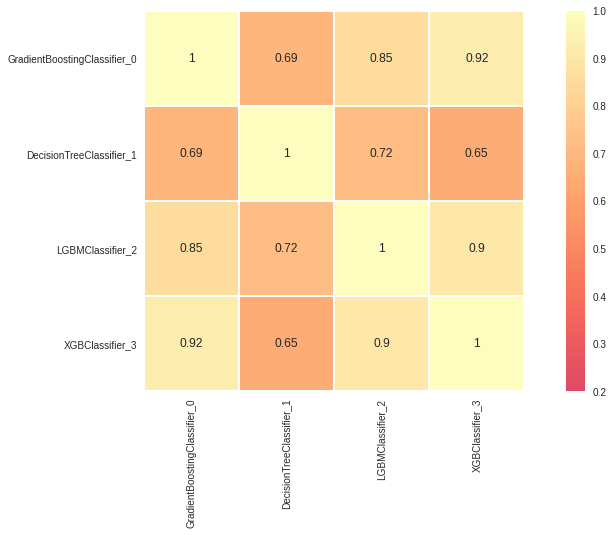

In [215]:
stack_soft_plot = stack_models([gbc,dt,lightgbm,xgboost], plot=True)

In [216]:
#model calibration
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.6313,0.2308,0.5000,0.3158,0.2263
1,0.7465,0.5179,0.1538,0.2222,0.1818,0.0377
2,0.8028,0.5939,0.1667,0.3333,0.2222,0.1235
3,0.7887,0.7507,0.3333,0.3636,0.3478,0.2221
4,0.8028,0.6857,0.0833,0.2500,0.1250,0.0442
5,0.8169,0.6003,0.1667,0.4000,0.2353,0.1509
6,0.8169,0.7415,0.2500,0.4286,0.3158,0.2185
7,0.7887,0.6575,0.1667,0.2857,0.2105,0.0982
8,0.8310,0.7302,0.3333,0.5000,0.4000,0.3062
9,0.8286,0.8017,0.0833,0.5000,0.1429,0.0987


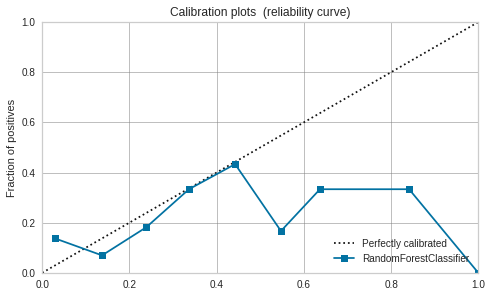

In [217]:
plot_model(rf, plot='calibration')


In [218]:
calibrated_rf = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8028,0.6757,0.0000,0.0,0.0000,-0.0269
1,0.8028,0.5398,0.0000,0.0,0.0000,-0.0269
2,0.8169,0.6617,0.0000,0.0,0.0000,-0.0267
3,0.7887,0.7655,0.0000,0.0,0.0000,-0.0725
4,0.8310,0.7458,0.0000,0.0,0.0000,0.0000
5,0.8451,0.5572,0.0833,1.0,0.1538,0.1313
6,0.8310,0.7218,0.0000,0.0,0.0000,0.0000
7,0.8310,0.6766,0.0000,0.0,0.0000,0.0000
8,0.8310,0.7006,0.0000,0.0,0.0000,0.0000
9,0.8286,0.8125,0.0000,0.0,0.0000,0.0000


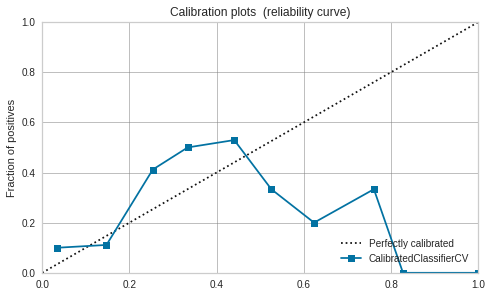

In [219]:
plot_model(calibrated_rf, plot='calibration')

In [220]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8028,0.7023,0.0000,0.000,0.0000,-0.0269
1,0.7887,0.5305,0.0000,0.000,0.0000,-0.0513
2,0.8028,0.6419,0.0833,0.250,0.1250,0.0442
3,0.7746,0.7613,0.0000,0.000,0.0000,-0.0923
4,0.8169,0.7366,0.0000,0.000,0.0000,-0.0267
5,0.8310,0.5600,0.0833,0.500,0.1429,0.0994
6,0.8310,0.7514,0.0000,0.000,0.0000,0.0000
7,0.8310,0.7203,0.1667,0.500,0.2500,0.1808
8,0.8169,0.6942,0.0000,0.000,0.0000,-0.0267
9,0.8429,0.8125,0.0833,1.000,0.1538,0.1309


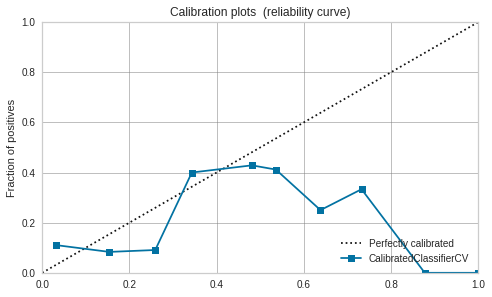

In [222]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [223]:
#predict on test hold-out sample

In [224]:
predict_model(stack_soft);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.8257,0.774,0.0943,0.5,0.1587,0.1094


In [225]:
#finalize model for deployment
final_stack_soft = finalize_model(stack_soft)

In [226]:
#predict on unseen data 
unseen_predictions = predict_model(final_stack_soft, data=data_unseen)
unseen_predictions.head()

,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,X-class,C-class,M-class,Class_B,...,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X,Label,Score
0,1,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0611
1,1,3,1,1,2,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0.0676
2,1,3,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.0537
3,1,3,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.2556
4,1,3,1,2,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.2571


In [227]:
save_experiment('Experiment_123 22May2020')


Experiment Succesfully Saved


In [228]:
saved_experiment = load_experiment('Experiment_123 22May2020')


,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Compare Models Score Grid
7,Decision Tree
8,Decision Tree Score Grid
9,Decision Tree


In [229]:
final_stack_soft_loaded = saved_experiment[57]


In [230]:
new_prediction = predict_model(final_stack_soft_loaded, data=data_unseen)
new_prediction.head()

,Activity,Evolution,24hr activity,Historically-complex,Become complex on this pass,Area,X-class,C-class,M-class,Class_B,...,Spot Size_K,Spot Size_R,Spot Size_S,Spot Size_X,Spot Distribution_C,Spot Distribution_I,Spot Distribution_O,Spot Distribution_X,Label,Score
0,1,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0611
1,1,3,1,1,2,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0.0676
2,1,3,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.0537
3,1,3,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.2556
4,1,3,1,2,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.2571


# Feature extraction, train test split, modeling building, evaluation matrix

# Identify which target variable, convert object to numeric by creating dummies, train test split, build model, check errors.

# If target is classification, apply log regression, if target is numeric- linear regression- decision tree regression- random forest regression